# Spotify Music Recommendation

#  Problem Statement

In the era of digital streaming, platforms like Spotify aim to provide personalized and engaging listening experiences to users. With millions of songs available, helping users discover music they will enjoy is a key challenge.

This project focuses on building a music recommendation system using Spotify track features, with the goal of suggesting songs that are similar in style, mood, or user preference.

# Objective

The primary objective is to develop a recommendation model that:

Suggests songs similar to a given track,

Groups songs into clusters based on their audio features,

Or personalizes suggestions for a specific user or mood.

# <b>Features Description<b>

genre - Music category (e.g., "Movie" soundtrack)

artist_name - Performer (e.g., "Henri Salvador")

track_name - Song title (e.g., "C'est beau de faire un Show")

track_id - Unique Spotify code (e.g., "0BRjO6ga9RKCKjfDqeFgWV")

popularity - 0-100 score (0=least popular in your sample)

acousticness - 0-1 (1=highly acoustic like "Don't Let Me Be Lonely Tonight" at 0.952)

danceability - 0-1 (0.663=moderate danceability for Joseph Williams' track)

duration_ms - Length in milliseconds (e.g., 99373ms ≈ 99 seconds)

energy - 0-1 intensity (0.910=high energy for Henri Salvador's first track)

instrumentalness - 0-1 (0=has vocals, 0.123=some instruments in Fabien Nataf's track)

key - Musical pitch (e.g., "C#", "F")

liveness - 0-1 (0.346=some live audience noise in first track)

loudness - Decibels (dB) (-1.828=louder than -21.150)

mode - Major (happy) or Minor (sad) scale

speechiness - 0-1 (0.0868=some spoken words in Gad Elmaleh's track)

tempo - BPM (166.969=fast, 99.488=slow)

time_signature - Beats per bar (4/4=common time)

valence - 0-1 positivity (0.814=very happy mood in first track)

In [1]:
import kagglehub
spotify_path = kagglehub.dataset_download('zaheenhamidani/ultimate-spotify-tracks-db')

In [2]:
print(spotify_path)

C:\Users\aadit\.cache\kagglehub\datasets\zaheenhamidani\ultimate-spotify-tracks-db\versions\3


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("C:/Users/aadit/.cache/kagglehub/datasets/zaheenhamidani/ultimate-spotify-tracks-db/versions/3/SpotifyFeatures.csv")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

# Statistical Analysis

In [5]:
df.shape

(232725, 18)

In [6]:
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [7]:
print(df.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


### checking nan values

In [8]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [9]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Since there are no null values except 1 in track_name, we don't have to worry about filling in missing information and we can simply remove that row with null value in track_name

## Data Cleaning

In [10]:
# Checking for duplicate entries based on the 'track_id' column.
duplicate_count = df.duplicated(subset='track_id', keep='first').sum()

print("Number of duplicate entries based on track id:", duplicate_count)

Number of duplicate entries based on track id: 55951


In [11]:
# Removing duplicate entries to ensure data integrity.
df = df.drop_duplicates(subset='track_id', keep='first')

In [12]:
# Converting track duration from milliseconds to minutes for better interpretability.
df['duration_ms'] = round(df['duration_ms'] / 1000 /60,1)
df['duration_ms'] = df['duration_ms'].rename('duration_min')

In [13]:
# Identifying songs with incorrect time signatures.
df.loc[df['time_signature'] == '0/4','track_name']

14520                                               Imma Be
59106     Adagio for Strings and Organ in G minor (Arr. ...
80544                      Aida: Numi, pietà del mio martir
82665                                Fra poco a me ricovero
167567    Good to Be in Austin/Airport Security/Broke Tooth
208898                                               Nanou2
Name: track_name, dtype: object

In [14]:
df.duplicated().sum()

0

In [15]:
#fixing incorrect data in Time Signature
df['time_signature'] = df['time_signature'].replace('0/4','4/4')

In [16]:
df['time_signature'].value_counts()

time_signature
4/4    149193
3/4     20806
5/4      4430
1/4      2345
Name: count, dtype: int64

## Saving a final df for suggesting music to user 

In [17]:
final_df=df.copy()
final_df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0          1.7   0.910             0.000  C#    0.3460    -1.828  Major   
1          2.3   0.737             0.000  F#    0.1510    -5.559  Minor   
2          2.8   0.131             0.000   C    0.1030   -13.879  Minor   
3          2.5   0.326             0.000  C#    0.0985   -12.178  Major   
4          1.4   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

### Removing columns that are not relevant

In [18]:
# Removing columns that are not relevant.
del_col = ['artist_name','track_name','track_id']
for i in df.columns:
  if i in del_col:
    df.drop(i,axis = 1,inplace = True)

In [19]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [20]:
# Standardizing genre names for consistency.
df['genre'].replace("Children’s Music","Children's Music",inplace = True)
df['genre'].replace("Children's Music","Children Music", inplace = True)
df['genre'].replace('A Capella','Acapella',inplace = True)

**5. Exploratory Analysis**

We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.

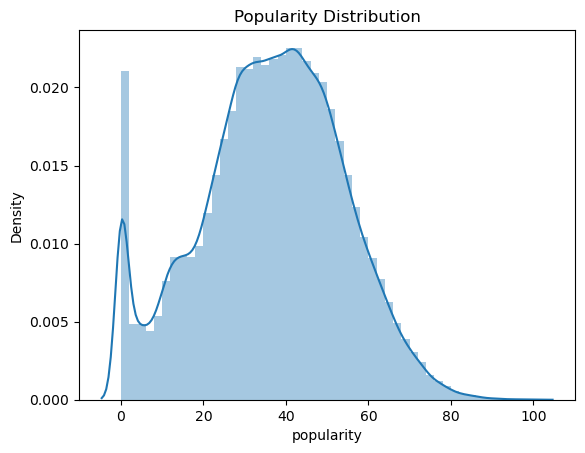

In [24]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')
plt.show()

In [25]:
df.corr(numeric_only=True)

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.359111      0.222052     0.019387   
acousticness       -0.359111      1.000000     -0.379018     0.010250   
danceability        0.222052     -0.379018      1.000000    -0.124195   
duration_ms         0.019387      0.010250     -0.124195     1.000000   
energy              0.234068     -0.729884      0.365232    -0.029905   
instrumentalness   -0.147899      0.305213     -0.370872     0.069608   
liveness           -0.161714      0.078869     -0.026899     0.023573   
loudness            0.321599     -0.693157      0.460542    -0.042874   
speechiness        -0.162072      0.172665      0.133137    -0.011606   
tempo               0.082825     -0.260823      0.046786    -0.030054   
valence             0.048818     -0.348577      0.587601    -0.146942   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.234068         -0.147899 -0.161714  0.321599    -0.162072   
acousticness     -0.729884          0.305213  0.078869 -0.693157     0.172665   
danceability      0.365232         -0.370872 -0.026899  0.460542     0.133137   
duration_ms      -0.029905          0.069608  0.023573 -0.042874    -0.011606   
energy            1.000000         -0.391797  0.210485  0.824522     0.162432   
instrumentalness -0.391797          1.000000 -0.162712 -0.501382    -0.191648   
liveness          0.210485         -0.162712  1.000000  0.057915     0.555547   
loudness          0.824522         -0.501382  0.057915  1.000000     0.000802   
speechiness       0.162432         -0.191648  0.555547  0.000802     1.000000   
tempo             0.241539         -0.109288 -0.062021  0.246279    -0.101591   
valence           0.449565         -0.331214  0.005851  0.426938     0.018769   

                     tempo   valence  
popularity        0.082825  0.048818  
acousticness     -0.260823 -0.348577  
danceability      0.046786  0.587601  
duration_ms      -0.030054 -0.146942  
energy            0.241539  0.449565  
instrumentalness -0.109288 -0.331214  
liveness         -0.062021  0.005851  
loudness          0.246279  0.426938  
speechiness      -0.101591  0.018769  
tempo             1.000000  0.159027  
valence           0.159027  1.000000

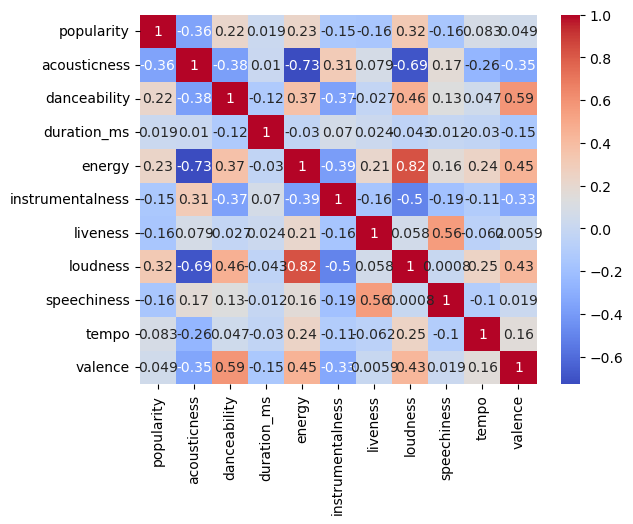

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

# Univariate Analysis

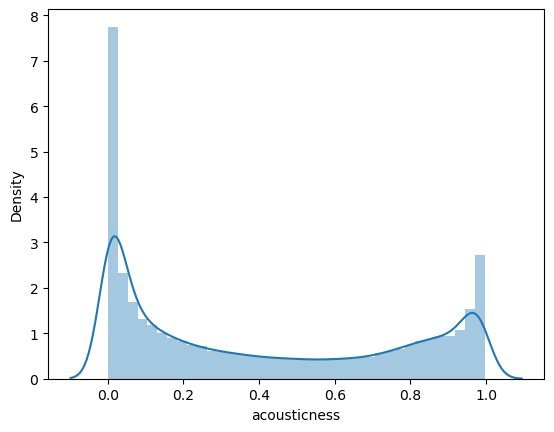

In [27]:
sns.distplot(df['acousticness'],kde=True)
plt.show()

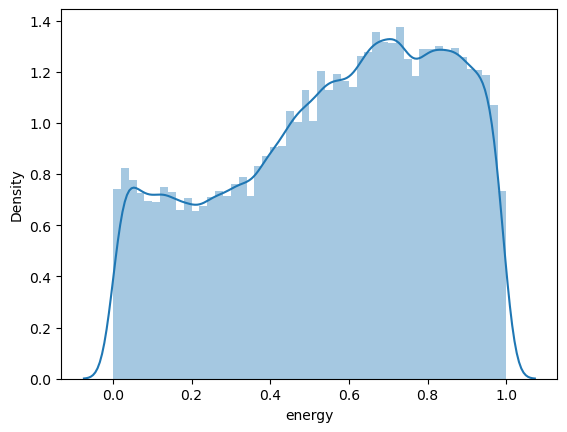

In [28]:
sns.distplot(df['energy'],kde=True)
plt.show()

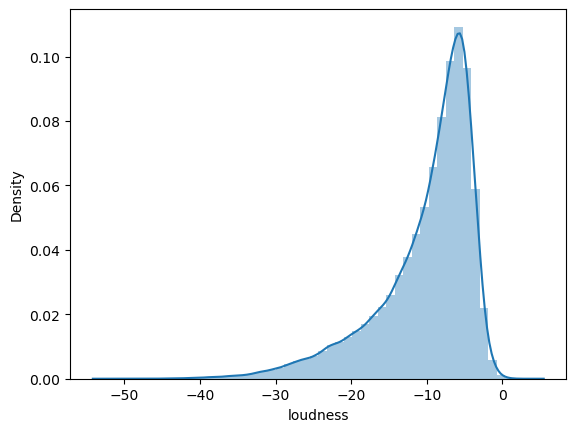

In [29]:
sns.distplot(df['loudness'],kde=True)
plt.show()

# Outlier

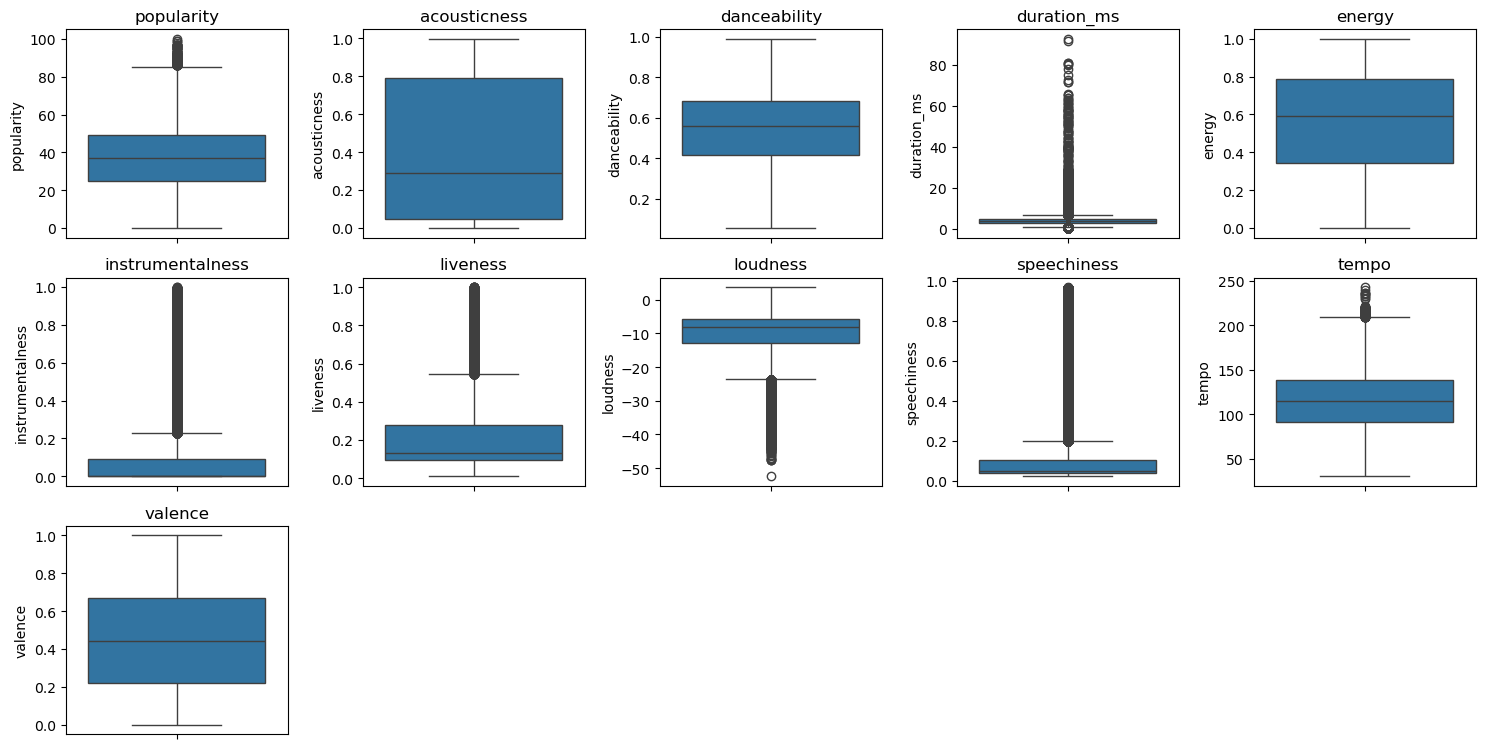

In [30]:
plt.figure(figsize=(15,15))
t = 1
for i in df.select_dtypes(include = 'number'):
    plt.subplot(6,5,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [21]:
skewness = df.select_dtypes(include = 'number').apply(lambda x: x.skew())
pos_skew = skewness[skewness > 2]
neg_skew = skewness[skewness < -2]
print('Positive Skewness:\n',pos_skew)
print('Negative Skewness:\n',neg_skew)

Positive Skewness:
 duration_ms    9.445646
speechiness    3.102435
dtype: float64
Negative Skewness:
 Series([], dtype: float64)


In [22]:
df['speechiness'] = np.log1p(df['speechiness'])
df['duration_ms'] = np.log1p(df['duration_ms'])

# Bivariate Analysis

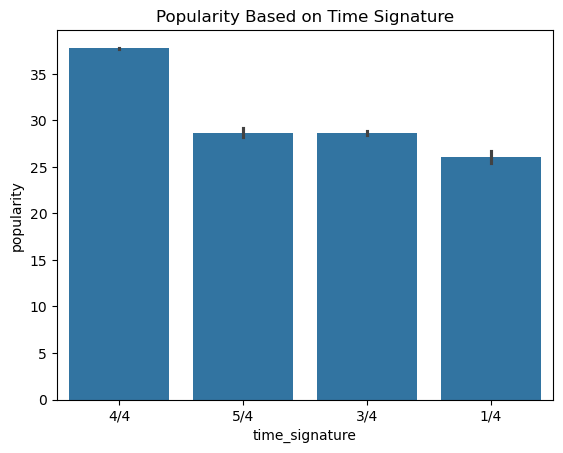

In [33]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')
plt.show()

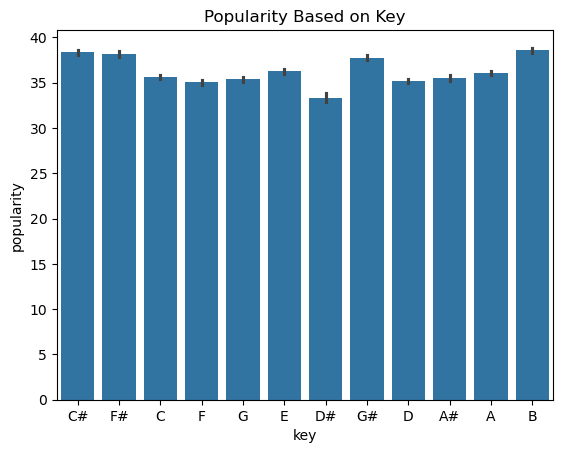

In [34]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')
plt.show()

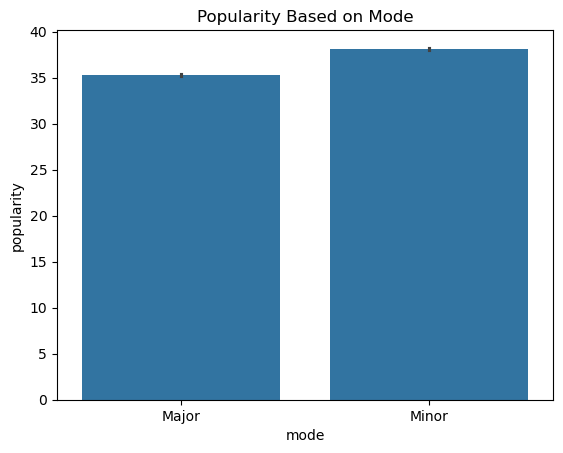

In [35]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')
plt.show()

Since key and mode are related (there can be A major or A minor), we combine those two features in another barplot using "hue".

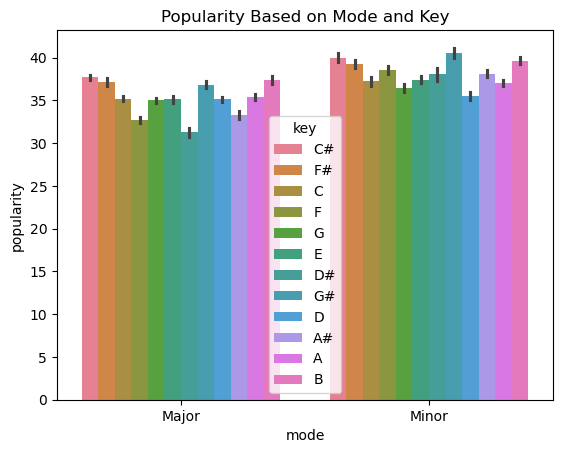

In [36]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')
plt.show()

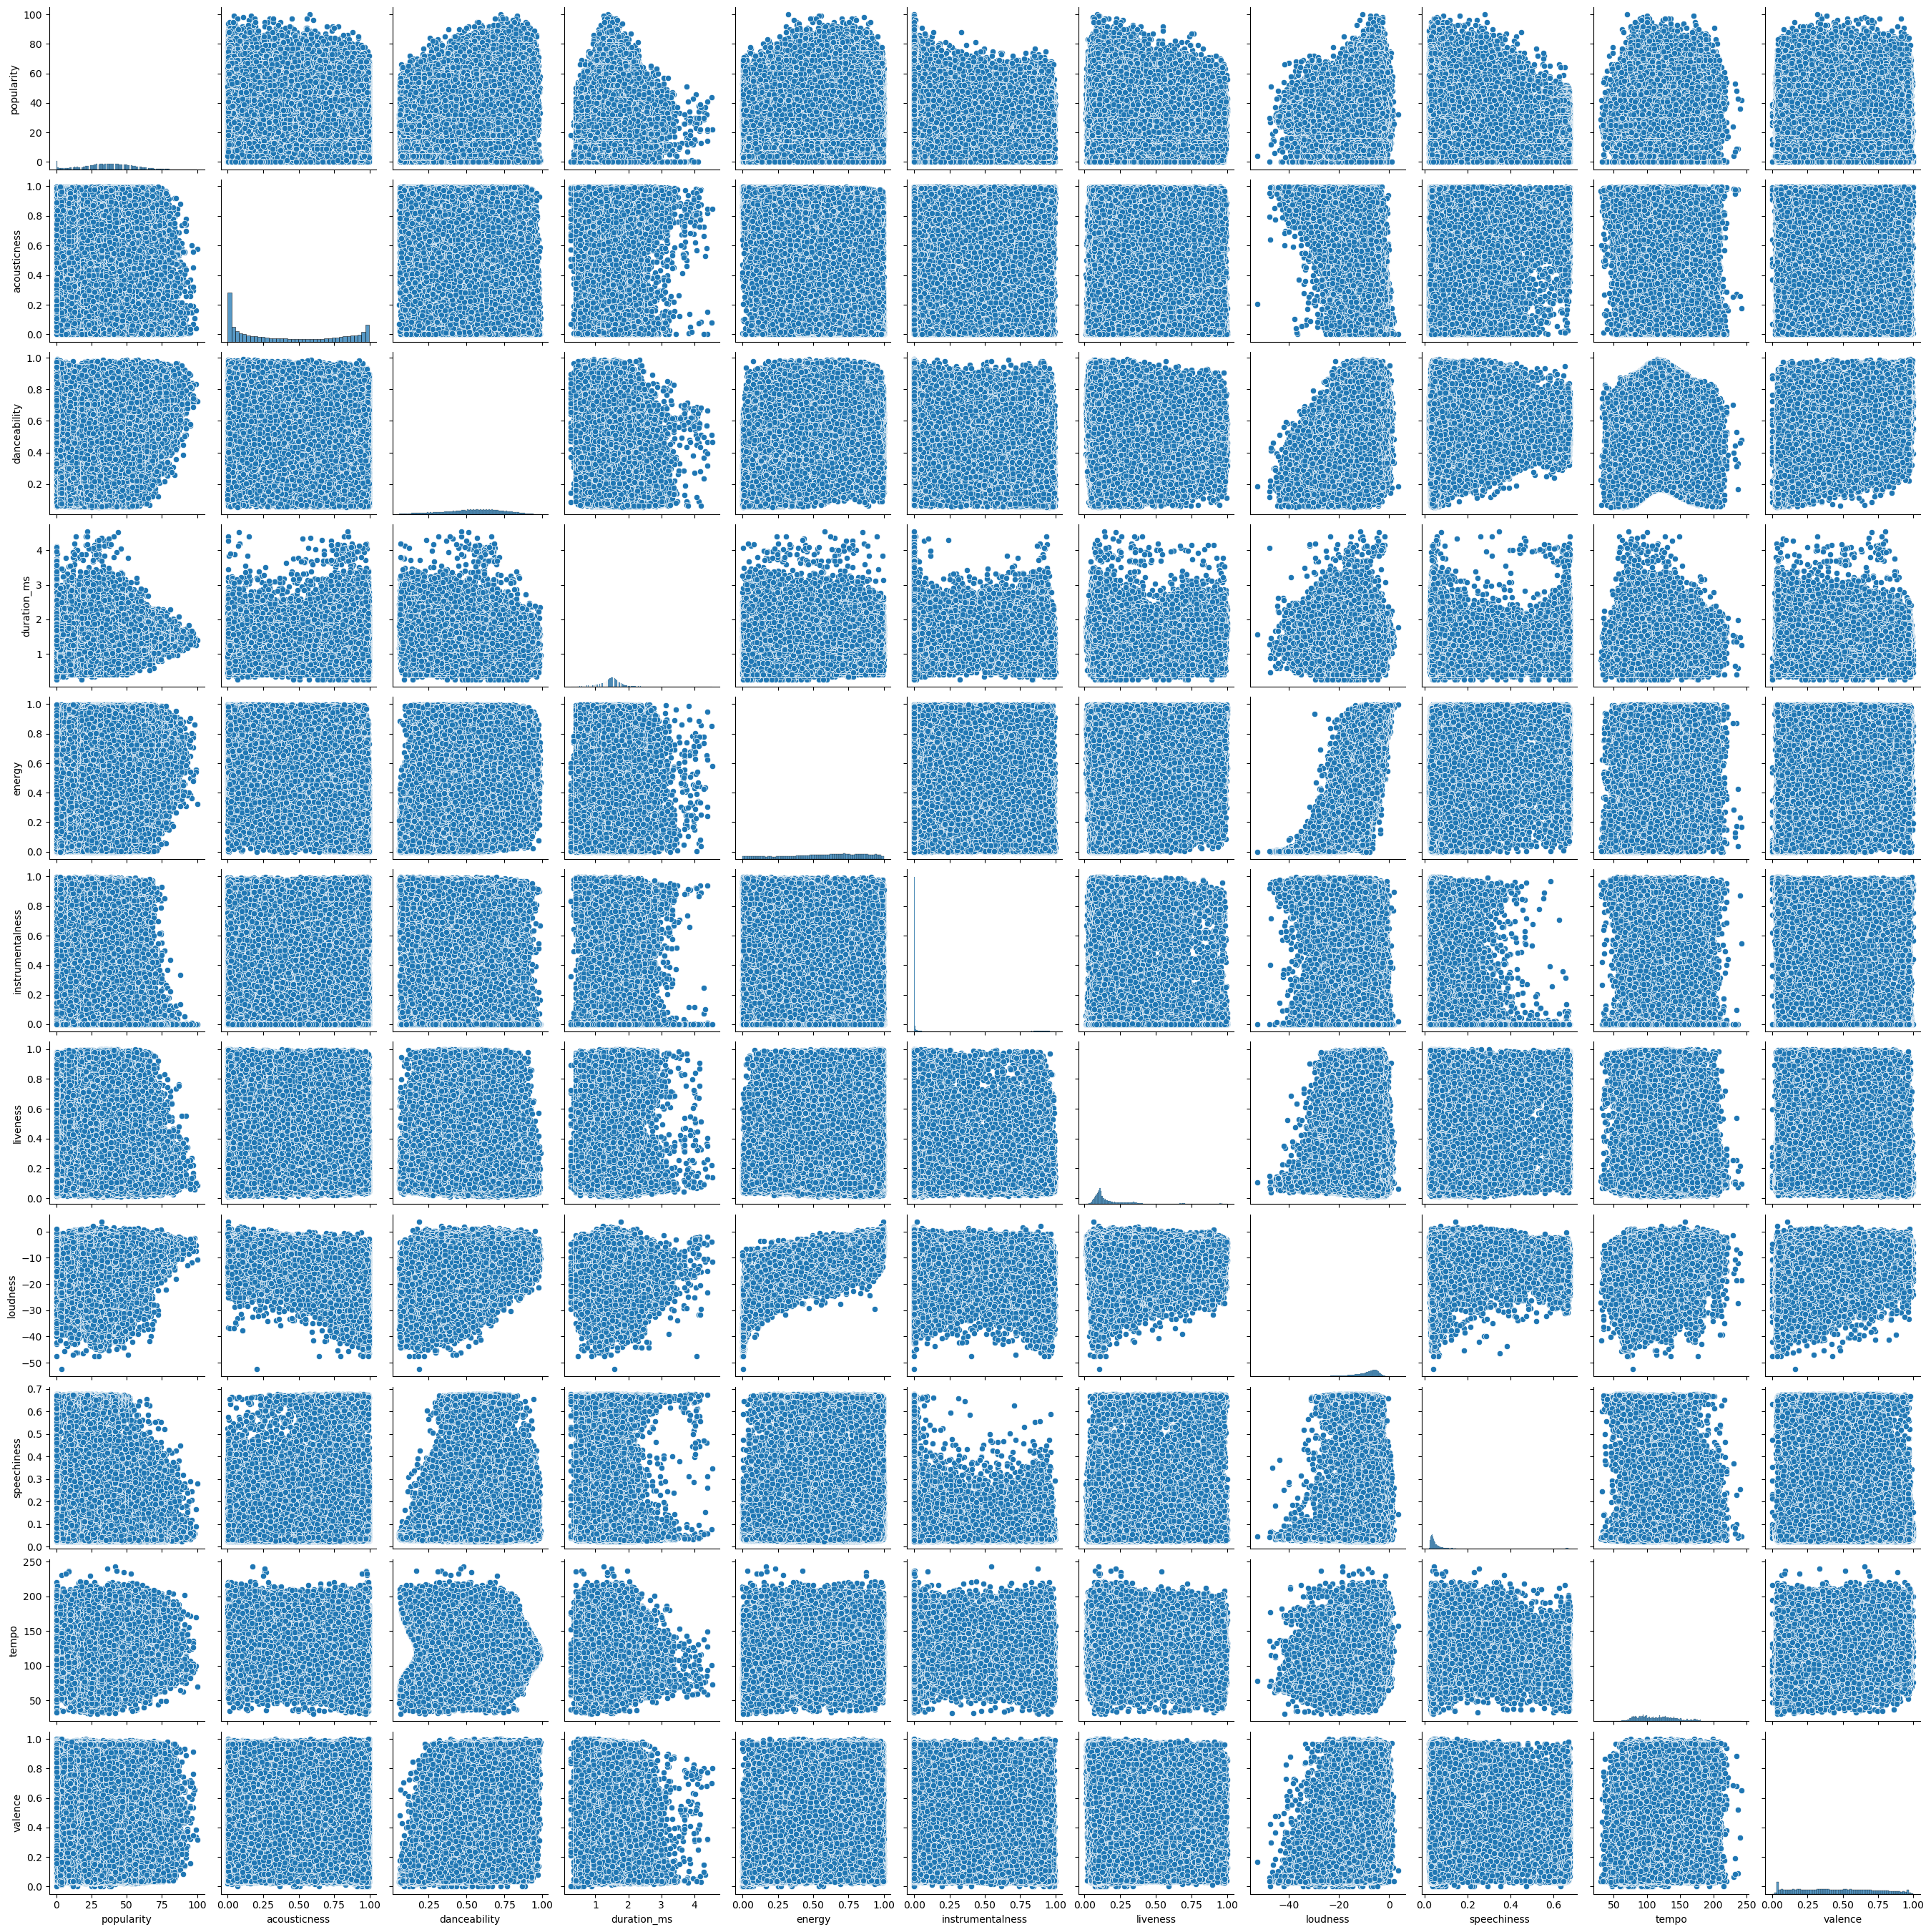

In [37]:
sns.pairplot(df)
plt.show()

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = df.select_dtypes(include = 'number').columns
df[num_col] = scaler.fit_transform(df[num_col])

In [24]:
df.head()

genre  popularity  acousticness  danceability  duration_ms    energy  \
0  Movie   -2.085747      0.564740     -0.798733    -1.646341  1.279646   
1  Movie   -2.028246     -0.431708      0.257016    -1.039247  0.652467   
2  Movie   -1.913244      1.495668      0.640447    -0.612439 -1.544471   
3  Movie   -2.085747      0.815900     -1.581352    -0.861235 -0.837536   
4  Movie   -1.855743      1.490208     -1.103376    -2.002673 -1.203692   

   instrumentalness key  liveness  loudness   mode  speechiness     tempo  \
0         -0.532841  C#  0.575611  1.299283  Major    -0.384671  1.588677   
1         -0.532841  F# -0.348444  0.715907  Minor    -0.165891  1.813226   
2         -0.532841   C -0.575904 -0.585001  Minor    -0.491152 -0.565544   
3         -0.532841  C# -0.597228 -0.319034  Major    -0.469460  1.741558   
4         -0.151959   F -0.106768 -1.721889  Major    -0.429543  0.746124   

  time_signature   valence  
0            4/4  1.353170  
1            4/4  1.360637  
2            5/4 -0.312134  
3            4/4 -0.838608  
4            4/4 -0.229989

In [25]:
import pickle
categorical_cols_to_encode = ['genre', 'key', 'mode', 'time_signature']
frequency_maps = {}

for col in categorical_cols_to_encode:
    if col in df.columns and df[col].dtype == 'object':
        # Calculate frequency map and convert to dictionary for easier saving/loading
        freq_map = df[col].value_counts(normalize=True).to_dict()
        frequency_maps[col] = freq_map

        # Save each frequency map to a separate .pkl file
        with open(f'{col}_freq_map.pkl', 'wb') as f:
            pickle.dump(freq_map, f)
        print(f"Saved {col}_freq_map.pkl")
    else:
        print(f"Warning: Column '{col}' not found or not 'object' dtype in 'df'. Skipping frequency map creation for this column.")


Saved genre_freq_map.pkl
Saved key_freq_map.pkl
Saved mode_freq_map.pkl
Saved time_signature_freq_map.pkl


In [26]:
#Applying frequency encoding to categorical columns.
for col in df.columns:
    if df[col].dtype == 'object':
        frequency_map = df[col].value_counts(normalize=True)
        df[col+'_encoded'] = df[col].map(frequency_map)

print(df)

        genre  popularity  acousticness  danceability  duration_ms    energy  \
0       Movie   -2.085747      0.564740     -0.798733    -1.646341  1.279646   
1       Movie   -2.028246     -0.431708      0.257016    -1.039247  0.652467   
2       Movie   -1.913244      1.495668      0.640447    -0.612439 -1.544471   
3       Movie   -2.085747      0.815900     -1.581352    -0.861235 -0.837536   
4       Movie   -1.855743      1.490208     -1.103376    -2.002673 -1.203692   
...       ...         ...           ...           ...          ...       ...   
232716   Soul    0.156796     -0.472658      1.023878     0.030629  0.521956   
232717   Soul    0.386801     -0.819368      1.370541    -0.168915 -0.148727   
232719   Soul   -0.245712      0.441890     -0.620148    -0.948932 -0.797657   
232721   Soul    0.099295     -1.013470      1.281249     0.614225  0.456700   
232724   Soul   -0.073208     -0.837659      1.139432     0.964654 -0.315491   

        instrumentalness key  liveness 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   genre                   176774 non-null  object 
 1   popularity              176774 non-null  float64
 2   acousticness            176774 non-null  float64
 3   danceability            176774 non-null  float64
 4   duration_ms             176774 non-null  float64
 5   energy                  176774 non-null  float64
 6   instrumentalness        176774 non-null  float64
 7   key                     176774 non-null  object 
 8   liveness                176774 non-null  float64
 9   loudness                176774 non-null  float64
 10  mode                    176774 non-null  object 
 11  speechiness             176774 non-null  float64
 12  tempo                   176774 non-null  float64
 13  time_signature          176774 non-null  object 
 14  valence                 1

In [28]:
# Dropping original categorical columns.
obj_list = df.select_dtypes(include = 'object').columns
df.drop(obj_list,axis = 1,inplace = True)
df1=df.copy()

In [29]:
df1.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre_encoded', 'key_encoded', 'mode_encoded',
       'time_signature_encoded'],
      dtype='object')

# KMeans without PCA

In [30]:
# K-Means No PCA.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',n_init=10, random_state = 42)
df1['cluster_nopca'] = kmeans.fit_predict(df1)


In [31]:
from sklearn.metrics import calinski_harabasz_score
#cluster_labels = kmeans.labels_
calinski_harabasz_index = calinski_harabasz_score(df1, df1['cluster_nopca'])
print("Calinski-Harabasz Index:", calinski_harabasz_index)

Calinski-Harabasz Index: 59805.34360333428


In [32]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_value = davies_bouldin_score(df1, df1['cluster_nopca'])
print("Davies Bouldin Index:", davies_bouldin_score_value)



Davies Bouldin Index: 1.1468673674008072


In [33]:
df1=df1.drop(columns=['cluster_nopca'])


In [34]:
df1.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre_encoded', 'key_encoded', 'mode_encoded',
       'time_signature_encoded'],
      dtype='object')

# Dimensionality reduction using PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df1)
n_components_selected = pca.n_components_
print(f"\nPCA selected {n_components_selected} components to retain 95% of the variance.")



PCA selected 2 components to retain 95% of the variance.


In [36]:
n_components_selected = pca.n_components_
pca_columns = [f'PC{i+1}' for i in range(n_components_selected)]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)


## Model fitting

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

wcss = []
davies_bouldin_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

    if num_clusters > 1:
        score = davies_bouldin_score(pca_df, kmeans.labels_)
        davies_bouldin_scores.append(score)
    else:
        davies_bouldin_scores.append(None)


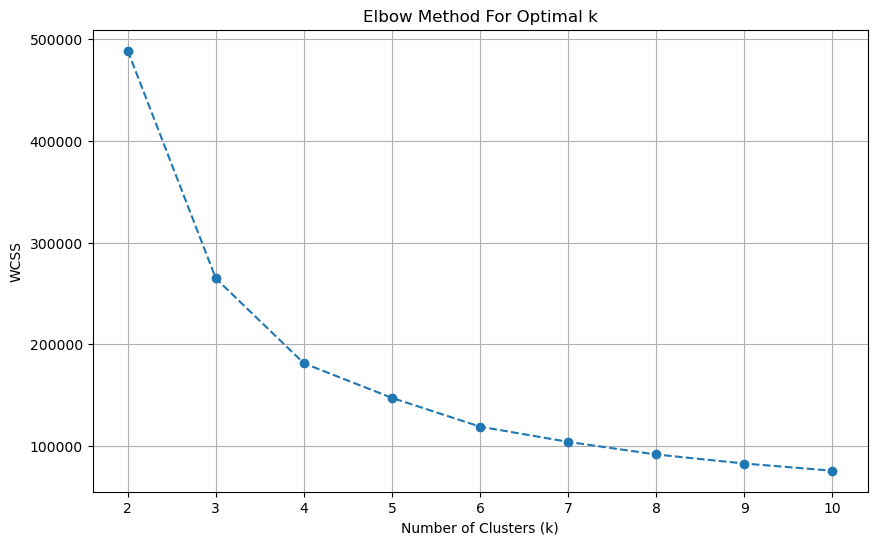

In [38]:

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


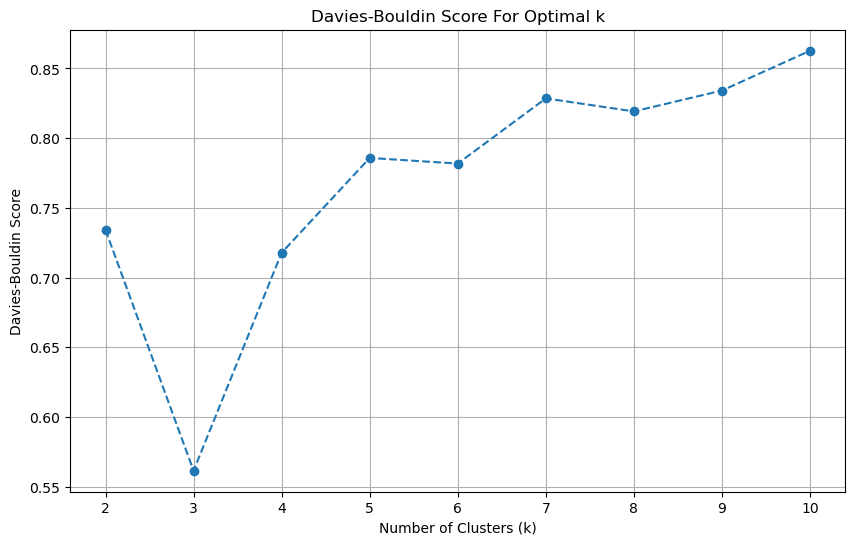

In [39]:

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o', linestyle='--')
plt.title('Davies-Bouldin Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [40]:
optimal_k = 10
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_optimal.fit(pca_df)

cluster_labels = kmeans_optimal.labels_
pca_df['cluster'] = cluster_labels

print(pca_df.head())

        PC1       PC2  cluster
0  1.141537  1.082290        5
1  1.390401  0.354683        5
2 -1.877718  0.547512        8
3 -1.701545 -0.080785        0
4 -2.647906  0.704001        8


## Model Evaluation

In [41]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_value = davies_bouldin_score(pca_df, kmeans.labels_)
print("Davies Bouldin Index:", davies_bouldin_score_value)

Davies Bouldin Index: 0.49751617015258576


In [42]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score_value = calinski_harabasz_score(pca_df, kmeans.labels_)

print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

Calinski-Harabasz Index: 669644.7860044476


# Saving Model & DataFrame along with their clusters

In [43]:
# Already created a final dataframe at the time of loading data from csv
final_df['cluster']=cluster_labels

In [52]:
#save final dataframe to be used to recommend songs
final_df.to_csv('Recommendation.csv',index=False)

In [38]:
import pickle

pickle.dump(scaler, open('scaler_model.pkl', 'wb'))
pickle.dump(pca, open('pca_model.pkl', 'wb'))
pickle.dump(kmeans_optimal, open('kmeans_model.pkl', 'wb'))